# Определяем тип звезды
#### © Шулюгин Иван МГУ ВМК 325. ноябрь 2020

## Dataset

Размеченные данные отсюда - https://www.kaggle.com/deepu1109/star-dataset

Каждая строка описывает следующие признаки звезды: 
<li> абсолютная температура (в Кельвинах) </li>
<li> относительная яркость (относительно Солнца) </li>
<li> относительный радиус (относительно Солнца) </li>
<li> абсолютная велечина </li>
<li> тип звезды (это цель)</li>
<li> цвет звезды </li>
<li> спектральный класс </li>


Тип звезды (биект.отображение): [0, 1, 2, 3, 4, 5] <-> [Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants]

In [1]:
# посмотрим на данные
import pandas as pd

In [2]:
file_name = '6_class.csv'

In [3]:
df = pd.read_csv(file_name)
df.head()

# rows = csv.reader(file_csv) # берем ряды таблицы
# df = pd.read_csv(file_csv, usecols=['Temperature (K)','Absolute magnitude(Mv)','Star type'])
# print(df.values)
# print(df.values.tolist)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Сделаем график, ориентируясь на температуру и абс.величину

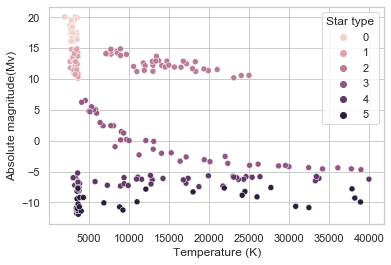

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type")
plt.show()

Он должен напоминать диаграмма Герцшпрунга — Рассела (Hertzsprung–Russell diagram, HR diagram)

In [6]:
# запустите эту ячейку, чтобы посмотреть на HR-диаграмму
from PIL import Image
from urllib.request import urlopen
url = "https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png"
image = Image.open(urlopen(url))
image.show()

hr_diagram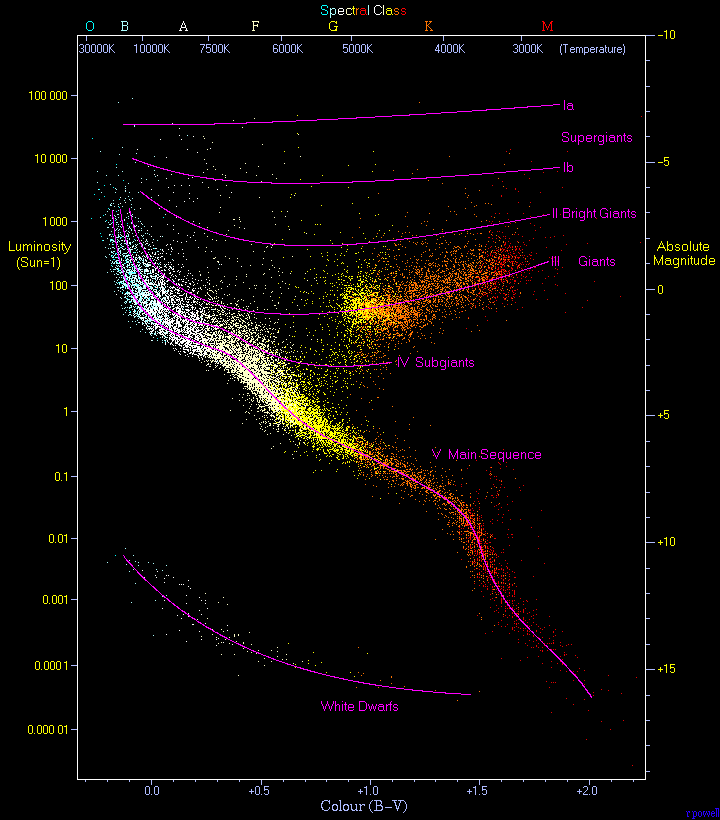

Заметно сходство

## Подготовим данные

Выделим отдельно признаки и ответы из таблицы, а также возьмем тесты

In [7]:
# названия колонок
cols = list(pd.read_csv(file_name, nrows = 1))
print(cols)

['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']


In [8]:
# берем все кроме типа звезды, цвета и спектрального класса (это все строки)
dfx = pd.read_csv(file_name, usecols =[i for i in cols if i not in ['Star type', 'Star color', 'Spectral Class']])
# берем ответы про тип звезды
dfy = pd.read_csv(file_name, usecols =['Star type'], squeeze=True)

In [9]:
# все преобразуем в списки
X = dfx.values.tolist()
Y = dfy.values.tolist()

In [10]:
# выбираем тесты
Xtest = []
Ytest = []
n_added = []
for i in range(0,len(X),10):
    Xtest.append(X[i])
    Ytest.append(Y[i])
    n_added.append(i)

# удаляем выбранные звезды из обучающей выборки
for i in n_added[::-1]:
    del X[i]
    del Y[i]
    
print('test count = ', len(Xtest))

test count =  24


In [11]:
# убедимся, что мы ничего не продублировали
for v in Xtest:
    if v in X:
        print('!!!')

In [12]:
# сверху ничего не попало, значит мы правильно разбили выборку
# оставшиеся данные в кол-ве...
print(len(X))
print(len(Y))

216
216


In [13]:
print(X[:5])
print(Y[:5])

[[3042.0, 0.0005, 0.1542, 16.6], [2600.0, 0.0003, 0.102, 18.7], [2800.0, 0.0002, 0.16, 16.65], [1939.0, 0.000138, 0.10300000000000001, 20.06], [2840.0, 0.00065, 0.11, 16.98]]
[0, 0, 0, 0, 0]


In [14]:
print(Xtest[0], Ytest[0])

[3068.0, 0.0024, 0.17, 16.12] 0


После всех действий выше мы имеем:
<li>Множества X, Y - выборка и ответы</li>
<li>Xtest, Ytest - тесты и ответы для тестов</li>

## Используем kNN (k-nearest neighbors)

#### Алгоритм kNN:
Ориентируясь на ближайших соседей в пространстве признаков, относит документ к классу

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# посмотрим на качество работы алгоритма, выбирая параметр
for n in range(1,13,2):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X, Y)
    print('neighbors number =', n ,'with score', neigh.score(Xtest,Ytest))
    # print(neigh.score(Xtest,Ytest))

neighbors number = 1 with score 0.6666666666666666
neighbors number = 3 with score 0.7916666666666666
neighbors number = 5 with score 0.75
neighbors number = 7 with score 0.7083333333333334
neighbors number = 9 with score 0.7083333333333334
neighbors number = 11 with score 0.6666666666666666


#### Лучше определяет тип звезды на тестовой выборке при n = 3

In [18]:
# берем ответы лучшей модели
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

Ypred = neigh.predict(Xtest)
Yprob = neigh.predict_proba(Xtest)
# возьмем вероятность отношения к классу
Yscore = []
for i in range(len(Yprob)):
    Yscore.append(max(Yprob[i]))

## Оцениваем kNN

In [19]:
# посмотрим на различные метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("Accuracy classification score is", accuracy_score(Ytest, Ypred, normalize=True))
print("F1 score is", f1_score(Ytest, Ypred, average='macro'))
print("Log loss is", log_loss(Ytest, Yprob))

Accuracy classification score is 0.7916666666666666
F1 score is 0.7712121212121211
Log loss is 3.1676073178666377


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss

## Используем RandomForest

#### Алгоритм RF:
Строится множество решающих деревьев, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо по следующей схеме:

<li>Выбирается подвыборка обучающей выборки заданного размера – по ней строится дерево (для каждого дерева — своя подвыборка).</li>

<li>Для построения каждого расщепления в дереве просматриваем max_features случайных признаков (для каждого нового расщепления — свои случайные признаки).</li>

<li>Выбираем наилучшие признак и расщепление по нему (по заранее заданному критерию). Дерево строится, как правило, до исчерпания выборки (пока в листьях не останутся представители только одного класса), но в современных реализациях есть параметры, которые ограничивают высоту дерева, число объектов в листьях и число объектов в подвыборке, при котором проводится расщепление.</li>

In [20]:
from sklearn.ensemble import RandomForestClassifier
for n in [10,50,100,300]:
    clf = RandomForestClassifier(n_estimators=n, max_depth=2, max_features=4, random_state=0)
    clf.fit(X, Y)
    print("n_estimators =", n, "with score", clf.score(Xtest, Ytest))

n_estimators = 10 with score 1.0
n_estimators = 50 with score 1.0
n_estimators = 100 with score 1.0
n_estimators = 300 with score 1.0


В таком случае, возьмем стандартное число деревьев

In [21]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, max_features=4, random_state=0)
clf.fit(X, Y)

Ypred = clf.predict(Xtest)
Yprob = clf.predict_proba(Xtest)
# возьмем вероятность отношения к классу
Yscore = []
for i in range(len(Yprob)):
    Yscore.append(max(Yprob[i]))

## Оцениваем RF

In [22]:
# посмотрим на различные метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("Accuracy classification score is", accuracy_score(Ytest, Ypred, normalize=True))
print("F1 score is", f1_score(Ytest, Ypred, average='macro'))
print("Log loss is", log_loss(Ytest, Yprob))

Accuracy classification score is 1.0
F1 score is 1.0
Log loss is 0.6951710602520763


## Вывод о работе kNN и RF

RF гораздо лучше справился с тестовой выборкой, чем kNN. Даже при небольшом кол-ве деревьев, задействуя все признаки выборки, мы видим огромную разницу. То есть RF модель можно еще и быстро обучить, уменьшив n_estimators.

Однако стоит заметить, что данных хотелось бы гораздо больше, для уверенной оценки.

#### © Шулюгин Иван МГУ ВМК 325. ноябрь 2020